In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt
plt.show(block=True)

## List of Content
-------------------------------

1. Clean white space
2. pandas reset index
3. Group by single field
4. Group --> first, last 
5. Group --> get_group --> specific group after filtering by one category
6. Group by multiple fields
7. pandas set index
8. Groupby index levels
9. Data aggregation at index level
10. Data aggregation non index levels
11. Group -- get group --> gathering multiple fields
12. Group by multiple field to get specific field and data aggretion
13. Data aggregation -- many examples
14. data grouping and manipulation --> lambda functions
15. functions to apply to groupby --> rolling
16. apply functions to data after groupby

[Pandas Tutorial and useful reference](https://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [2]:
datos = pd.read_excel('dump.xlsx',sheet_name='dump')

In [3]:
datos.head()

,Store,UniqueField,RECEIPTNO,ItemCode,Name,PSA,Category,SubCat,SuppCode,SuppName,TransactionDate,QtySold,unitcost,COGS,SalesAmount,Promotion,YYYY-MM-DD
290977,1,0000013465 4000411,3465,140103.0,SAHA EGGS MEDIUM 6 S,Other Daily Foods,Egg,Egg,49.0,4 CORNER (PROCESSED FOOD),2017-06-01,1,4.19,4.19,6.25,0.0,2017-06-01
290978,1,0000013466 4002402,3466,500024.0,MOUNTAIN DEW 2.25L PET,Beverage,Carbonated Beverage,Carbonated Beverage,30.0,DUBAI REFRESHMENT,2017-06-01,1,5.00,5.00,5.00,0.0,2017-06-01
290979,1,0000013467 4004630,3467,120022.0,AL AIN LABAN 500ML,Dairy Beverages,Other,Other,40.0,AL AIN FARMS FOR LIVESTOCK,2017-06-01,1,2.75,2.75,3.50,0.0,2017-06-01
290980,1,0000013468 4013146,3468,20071.0,CHICKEN CHAWERMA,Sandwiches,Wrap,Wrap,110.0,FRESH N BAKED PASTRIES LLC,2017-06-01,1,7.00,7.00,12.00,0.0,2017-06-01
290981,1,0000013468 4013146,3468,120058.0,ALMARAI MHR FLVRD STRAW 180 ML,Dairy Beverages,Flavored Milk,Flavored Milk,52.0,AL MARAI EMIRATES (CHILLED),2017-06-01,1,1.35,1.35,1.50,0.0,2017-06-01


## PSA category has white spaces which makes difficult to manipulate, let us fix it

In [4]:
datos['PSA'] = datos['PSA'].str.strip(' ')

In [5]:
datos.reset_index(inplace=True,drop=True)

In [6]:
datos.head()

,Store,UniqueField,RECEIPTNO,ItemCode,Name,PSA,Category,SubCat,SuppCode,SuppName,TransactionDate,QtySold,unitcost,COGS,SalesAmount,Promotion,YYYY-MM-DD
0,1,0000013465 4000411,3465,140103.0,SAHA EGGS MEDIUM 6 S,Other Daily Foods,Egg,Egg,49.0,4 CORNER (PROCESSED FOOD),2017-06-01,1,4.19,4.19,6.25,0.0,2017-06-01
1,1,0000013466 4002402,3466,500024.0,MOUNTAIN DEW 2.25L PET,Beverage,Carbonated Beverage,Carbonated Beverage,30.0,DUBAI REFRESHMENT,2017-06-01,1,5.00,5.00,5.00,0.0,2017-06-01
2,1,0000013467 4004630,3467,120022.0,AL AIN LABAN 500ML,Dairy Beverages,Other,Other,40.0,AL AIN FARMS FOR LIVESTOCK,2017-06-01,1,2.75,2.75,3.50,0.0,2017-06-01
3,1,0000013468 4013146,3468,20071.0,CHICKEN CHAWERMA,Sandwiches,Wrap,Wrap,110.0,FRESH N BAKED PASTRIES LLC,2017-06-01,1,7.00,7.00,12.00,0.0,2017-06-01
4,1,0000013468 4013146,3468,120058.0,ALMARAI MHR FLVRD STRAW 180 ML,Dairy Beverages,Flavored Milk,Flavored Milk,52.0,AL MARAI EMIRATES (CHILLED),2017-06-01,1,1.35,1.35,1.50,0.0,2017-06-01


## Groupby
-------------------------------

In [7]:
# the UniqueField holds together all the items purchased during the same transaction.
# i.e. the basket

grouped = datos.groupby('UniqueField')
grouped.sum().head(3)
# After grouping we are summing the elements that belong to the uniquefield

,Store,RECEIPTNO,ItemCode,SuppCode,QtySold,unitcost,COGS,SalesAmount,Promotion
UniqueField,,,,,,,,,
0000013465 4000411,1,3465,140103.0,49.0,1,4.19,4.19,6.25,0.0
0000013466 4002402,1,3466,500024.0,30.0,1,5.00,5.00,5.00,0.0
0000013467 4004630,1,3467,120022.0,40.0,1,2.75,2.75,3.50,0.0


In [8]:
# it sorts by ascending order
grouped.first().head(3)

,Store,RECEIPTNO,ItemCode,Name,PSA,Category,SubCat,SuppCode,SuppName,TransactionDate,QtySold,unitcost,COGS,SalesAmount,Promotion,YYYY-MM-DD
UniqueField,,,,,,,,,,,,,,,,
0000013465 4000411,1,3465,140103.0,SAHA EGGS MEDIUM 6 S,Other Daily Foods,Egg,Egg,49.0,4 CORNER (PROCESSED FOOD),2017-06-01,1,4.19,4.19,6.25,0.0,2017-06-01
0000013466 4002402,1,3466,500024.0,MOUNTAIN DEW 2.25L PET,Beverage,Carbonated Beverage,Carbonated Beverage,30.0,DUBAI REFRESHMENT,2017-06-01,1,5.00,5.00,5.00,0.0,2017-06-01
0000013467 4004630,1,3467,120022.0,AL AIN LABAN 500ML,Dairy Beverages,Other,Other,40.0,AL AIN FARMS FOR LIVESTOCK,2017-06-01,1,2.75,2.75,3.50,0.0,2017-06-01


In [9]:
# it sorts by descending order
grouped.last().head(3)

,Store,RECEIPTNO,ItemCode,Name,PSA,Category,SubCat,SuppCode,SuppName,TransactionDate,QtySold,unitcost,COGS,SalesAmount,Promotion,YYYY-MM-DD
UniqueField,,,,,,,,,,,,,,,,
0000013465 4000411,1,3465,140103.0,SAHA EGGS MEDIUM 6 S,Other Daily Foods,Egg,Egg,49.0,4 CORNER (PROCESSED FOOD),2017-06-01,1,4.19,4.19,6.25,0.0,2017-06-01
0000013466 4002402,1,3466,500024.0,MOUNTAIN DEW 2.25L PET,Beverage,Carbonated Beverage,Carbonated Beverage,30.0,DUBAI REFRESHMENT,2017-06-01,1,5.00,5.00,5.00,0.0,2017-06-01
0000013467 4004630,1,3467,120022.0,AL AIN LABAN 500ML,Dairy Beverages,Other,Other,40.0,AL AIN FARMS FOR LIVESTOCK,2017-06-01,1,2.75,2.75,3.50,0.0,2017-06-01


In [10]:
grouped = datos.groupby(['Store','PSA'])
grouped.first().head(3)

UniqueField  RECEIPTNO  ItemCode  \
Store PSA                                                    
1     Babies       0000016380 5004208       6380  670083.0   
      Bakery       0000013469 4015927       3469  150073.0   
      Beauty Aids  0000013603 4195649       3603  660035.0   

                                                       Name  \
Store PSA                                                     
1     Babies       MERRIES BABY DIAPER PANTS SZ M             
      Bakery       DATE DELIGHT 50GM MODRN BAKRY              
      Beauty Aids  DOVE MENCARE INVISIBLEDRY150ML             

                                         Category  \
Store PSA                                           
1     Babies       Baby Supply                      
      Bakery       Pastry                           
      Beauty Aids  Men's Cosmetics                  

                                           SubCat  SuppCode  \
Store PSA                                                     
1     Babies       Baby Supply                         85.0   
      Bakery       Pastry                              32.0   
      Beauty Aids  Men's Cosmetics                     46.0   

                                         SuppName TransactionDate  QtySold  \
Store PSA                                                                    
1     Babies       KAO CORP                            2017-06-09        1   
      Bakery       MODERN BAKERY LLC                   2017-06-01        1   
      Beauty Aids  ALGURG UNILEVER (NON FOOD)          2017-06-01        1   

                   unitcost    COGS  SalesAmount  Promotion YYYY-MM-DD  
Store PSA                                                               
1     Babies         53.670  53.670         72.0        0.0 2017-06-09  
      Bakery          1.056   1.056          2.5        0.0 2017-06-01  
      Beauty Aids    12.500  12.500         15.0        0.0 2017-06-01

In [11]:
# To get the full list of groups you can use:
# grouped.groups
# however because is a dictionary the format is not ideal

## Groupby at Index Level
--------------------------------------------
1. Grouping
2. aggregations

In [12]:
datos.set_index(['Store','YYYY-MM-DD'],inplace = True)

In [13]:
datos.groupby(level=0).sum()

,RECEIPTNO,ItemCode,SuppCode,QtySold,unitcost,COGS,SalesAmount,Promotion
Store,,,,,,,,
1,106571848,5.553244e+09,10186306.0,21132,70620.710,80064.758,106374.71,2734.5
2,146168781,9.819042e+09,11968520.0,36050,130323.835,152518.399,199445.23,1138.0
3,136493857,6.261713e+09,6653759.0,23471,92476.846,105845.816,138801.10,798.0
4,75391040,4.325060e+09,4750578.0,15018,47498.791,55272.174,71828.91,157.5
5,60455507,5.191516e+09,8101634.0,17207,56644.781,62899.182,82174.53,321.5
6,106648990,6.229335e+09,8124846.0,23486,79283.658,86508.968,116155.86,736.0
7,84355882,5.667253e+09,6576422.0,23088,87865.386,99699.761,134156.88,3553.5
9,137800791,9.558050e+09,13737959.0,36460,121819.501,138212.494,183744.05,2115.5
10,69020973,6.264024e+09,7032949.0,20685,70145.146,76169.617,99572.29,491.0


In [14]:
datos.groupby(level='YYYY-MM-DD').sum().head(3)

,RECEIPTNO,ItemCode,SuppCode,QtySold,unitcost,COGS,SalesAmount,Promotion
YYYY-MM-DD,,,,,,,,
2017-06-01,42141408,2.173735e+09,2740522.0,8000,28748.666,32014.103,41902.35,589.5
2017-06-02,34274765,1.772427e+09,2142747.0,6364,22282.598,25622.352,33188.19,240.5
2017-06-03,38456542,1.923379e+09,2190505.0,6719,23947.725,26878.434,34731.06,325.5


In [18]:
# Important: It has to be an index level!!!

datos.sum(level='Store').head(3)

,RECEIPTNO,ItemCode,SuppCode,QtySold,unitcost,COGS,SalesAmount,Promotion
Store,,,,,,,,
1,106571848,5.553244e+09,10186306.0,21132,70620.710,80064.758,106374.71,2734.5
2,146168781,9.819042e+09,11968520.0,36050,130323.835,152518.399,199445.23,1138.0
3,136493857,6.261713e+09,6653759.0,23471,92476.846,105845.816,138801.10,798.0


In [19]:
datos.groupby(['Store','PSA']).sum().head()

RECEIPTNO      ItemCode   SuppCode  QtySold  unitcost  \
Store PSA                                                                  
1     Babies            6380  6.700830e+05       85.0        1    53.670   
      Bakery         7536369  1.979373e+08    74630.0     1443  2875.808   
      Beauty Aids     258522  3.168528e+07     2212.0       48   784.660   
      Beverage      15682505  1.336788e+09   170951.0     3202  6346.180   
      Cigarette      6008876  5.671134e+08  1296531.0     1198  7216.700   

                       COGS  SalesAmount  Promotion  
Store PSA                                            
1     Babies         53.670        72.00        0.0  
      Bakery       3165.938      4958.25        0.0  
      Beauty Aids   784.660       949.00        0.0  
      Beverage     7591.775      8240.25      156.0  
      Cigarette    8904.510     10187.50        0.0

## Groupby.get_group follows SQL structure
---------------------------------------------------------------------

get group must have as many filters as the initial group by has, i.e. --> 1 to 1 , 2 to 2, etc.

In [20]:
datos.groupby(['PSA']).get_group('Sandwiches').head(3)

UniqueField  RECEIPTNO  ItemCode  \
Store YYYY-MM-DD                                            
1     2017-06-01  0000013468 4013146       3468   20071.0   
      2017-06-01  0000013493 4073004       3493   20055.0   
      2017-06-01  0000013511 4111201       3511   20020.0   

                                                      Name         PSA  \
Store YYYY-MM-DD                                                         
1     2017-06-01  CHICKEN CHAWERMA                          Sandwiches   
      2017-06-01  CHEESE DOG170 GM (MB)                     Sandwiches   
      2017-06-01  EGG MAYONNAISE PARATHA165GM MB            Sandwiches   

                                        Category  \
Store YYYY-MM-DD                                   
1     2017-06-01  Wrap                             
      2017-06-01  Sub Roll                         
      2017-06-01  Wrap                             

                                          SubCat  SuppCode  \
Store YYYY-MM-DD                                             
1     2017-06-01  Wrap                               110.0   
      2017-06-01  Sub Roll                            32.0   
      2017-06-01  Wrap                                32.0   

                                        SuppName TransactionDate  QtySold  \
Store YYYY-MM-DD                                                            
1     2017-06-01  FRESH N BAKED PASTRIES LLC          2017-06-01        1   
      2017-06-01  MODERN BAKERY LLC                   2017-06-01        1   
      2017-06-01  MODERN BAKERY LLC                   2017-06-01        1   

                  unitcost  COGS  SalesAmount  Promotion  
Store YYYY-MM-DD                                          
1     2017-06-01       7.0   7.0         12.0        0.0  
      2017-06-01       4.0   4.0          6.0        0.0  
      2017-06-01       3.0   3.0          5.0        0.0

In [21]:
datos.groupby(['YYYY-MM-DD','PSA']).get_group((dt.date(2017,6,20),'Sandwiches')).head(3)

UniqueField  RECEIPTNO  ItemCode  \
Store YYYY-MM-DD                                            
1     2017-06-20  0000015859 2093110       5859   20060.0   
      2017-06-20  0000015882 2132714       5882   20020.0   
      2017-06-20  0000015892 2145536       5892   20017.0   

                                                      Name         PSA  \
Store YYYY-MM-DD                                                         
1     2017-06-20  CHICKEN PARATHA165GM MODRN BKR            Sandwiches   
      2017-06-20  EGG MAYONNAISE PARATHA165GM MB            Sandwiches   
      2017-06-20  GRILLED CHICKEN BURGER175GR MB            Sandwiches   

                                        Category  \
Store YYYY-MM-DD                                   
1     2017-06-20  Wrap                             
      2017-06-20  Wrap                             
      2017-06-20  Sub Roll                         

                                          SubCat  SuppCode  \
Store YYYY-MM-DD                                             
1     2017-06-20  Wrap                                32.0   
      2017-06-20  Wrap                                32.0   
      2017-06-20  Sub Roll                            32.0   

                                        SuppName TransactionDate  QtySold  \
Store YYYY-MM-DD                                                            
1     2017-06-20  MODERN BAKERY LLC                   2017-06-20        1   
      2017-06-20  MODERN BAKERY LLC                   2017-06-20        1   
      2017-06-20  MODERN BAKERY LLC                   2017-06-20        1   

                  unitcost  COGS  SalesAmount  Promotion  
Store YYYY-MM-DD                                          
1     2017-06-20      3.25  3.25          5.5        0.0  
      2017-06-20      3.00  3.00          5.0        0.0  
      2017-06-20      4.70  4.70          8.0        0.0

In [22]:
datos.groupby(['YYYY-MM-DD','PSA'])[['COGS','SalesAmount']].aggregate(np.sum).head(3)

COGS  SalesAmount
YYYY-MM-DD PSA                               
2017-06-01 Babies         28.900        33.50
           Bakery       1313.132      2040.50
           Beauty Aids   417.090       494.25

In [23]:
datos.groupby(['YYYY-MM-DD','PSA']).size().head(3)

YYYY-MM-DD  PSA        
2017-06-01  Babies           2
            Bakery         436
            Beauty Aids     32
dtype: int64

In [24]:
grupodato = datos.groupby(['YYYY-MM-DD','PSA']).size().head(3)
print(grupodato.index.values[0])
print(grupodato.values[0])

(Timestamp('2017-06-01 00:00:00'), 'Babies')
2


In [25]:
grupodato

YYYY-MM-DD  PSA        
2017-06-01  Babies           2
            Bakery         436
            Beauty Aids     32
dtype: int64

In [44]:
grupodato.describe()

count      3.000000
mean     156.666667
std      242.374366
min        2.000000
25%       17.000000
50%       32.000000
75%      234.000000
max      436.000000
dtype: float64

## Aggregation functions 
---------------------------------------

In [28]:
datos.groupby(['Store','PSA'])['SalesAmount'].agg([len,np.sum,np.mean,np.std]).head(10)

len       sum       mean        std
Store PSA                                                           
1     Babies                     1.0     72.00  72.000000        NaN
      Bakery                  1319.0   4958.25   3.759098   2.943691
      Beauty Aids               48.0    949.00  19.770833   9.925766
      Beverage                2673.0   8240.25   3.082772   3.561833
      Cigarette               1031.0  10187.50   9.881183  12.175006
      Cleaning                  44.0    606.25  13.778409  11.581011
      Condiment                 27.0    176.75   6.546296   4.594121
      Confectionery           1436.0   5974.75   4.160689   4.662465
      Counter FF (Beverages)  1436.0   7647.00   5.325209   3.733839
      Counter FF (Foods)       390.0   2988.50   7.662821   4.879370

In [29]:
datos.groupby(['Store','PSA'])['SalesAmount'].agg([len,np.sum,np.mean,np.std]).\
rename(columns={'len':'Qx.','sum':'Total','mean':'Avg.','std':'Var'}).head(10)

Qx.     Total       Avg.        Var
Store PSA                                                           
1     Babies                     1.0     72.00  72.000000        NaN
      Bakery                  1319.0   4958.25   3.759098   2.943691
      Beauty Aids               48.0    949.00  19.770833   9.925766
      Beverage                2673.0   8240.25   3.082772   3.561833
      Cigarette               1031.0  10187.50   9.881183  12.175006
      Cleaning                  44.0    606.25  13.778409  11.581011
      Condiment                 27.0    176.75   6.546296   4.594121
      Confectionery           1436.0   5974.75   4.160689   4.662465
      Counter FF (Beverages)  1436.0   7647.00   5.325209   3.733839
      Counter FF (Foods)       390.0   2988.50   7.662821   4.879370

In [30]:
datos.groupby(['Store','PSA']).agg({'SalesAmount': np.sum,'COGS':len}).head(10)

SalesAmount    COGS
Store PSA                                        
1     Babies                        72.00     1.0
      Bakery                      4958.25  1319.0
      Beauty Aids                  949.00    48.0
      Beverage                    8240.25  2673.0
      Cigarette                  10187.50  1031.0
      Cleaning                     606.25    44.0
      Condiment                    176.75    27.0
      Confectionery               5974.75  1436.0
      Counter FF (Beverages)      7647.00  1436.0
      Counter FF (Foods)          2988.50   390.0

## Custom calculations with Lambda functions
----------------------------------------------------------------------

In [57]:
key = lambda x: x.day
# Python offers the ability to use day, week, month and automatically detect and group dates
zscore = lambda x: (x - x.mean()) / x.std()

datooss = datos.copy()
datooss.reset_index(inplace=True)
datooss = datooss[['YYYY-MM-DD','SalesAmount']]

In [58]:
datooss.set_index('YYYY-MM-DD',inplace=True)

In [59]:
datooss.head(10)

,SalesAmount
YYYY-MM-DD,
2017-06-01,6.25
2017-06-01,5.00
2017-06-01,3.50
2017-06-01,12.00
2017-06-01,1.50
2017-06-01,6.00
2017-06-01,2.50
2017-06-01,1.25
2017-06-01,16.00


In [60]:
transformed = datooss.groupby(key).transform(zscore)

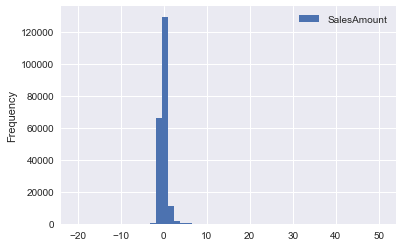

In [62]:
transformed.plot(kind='hist',bins=50);

In [64]:
datiiss = datos.copy()
datiiss.reset_index(inplace=True)
datiiss = datiiss[['YYYY-MM-DD','SalesAmount']]
datiiss.set_index(['YYYY-MM-DD'],inplace=True)

In [65]:
f = lambda x: x.fillna(x.max())
transformed = datiiss.transform(f)

In [67]:
transformed.head(10)

,SalesAmount
YYYY-MM-DD,
2017-06-01,6.25
2017-06-01,5.00
2017-06-01,3.50
2017-06-01,12.00
2017-06-01,1.50
2017-06-01,6.00
2017-06-01,2.50
2017-06-01,1.25
2017-06-01,16.00


In [68]:
datos.groupby('YYYY-MM-DD').rolling(4)['SalesAmount'].mean().head()

YYYY-MM-DD  Store  YYYY-MM-DD
2017-06-01  1      2017-06-01       NaN
                   2017-06-01       NaN
                   2017-06-01       NaN
                   2017-06-01    6.6875
                   2017-06-01    5.5000
Name: SalesAmount, dtype: float64

In [69]:
datos.groupby('YYYY-MM-DD')['SalesAmount'].expanding().sum().head()

YYYY-MM-DD  Store  YYYY-MM-DD
2017-06-01  1      2017-06-01     6.25
                   2017-06-01    11.25
                   2017-06-01    14.75
                   2017-06-01    26.75
                   2017-06-01    28.25
Name: SalesAmount, dtype: float64

In [70]:
datos.groupby('YYYY-MM-DD')['SalesAmount'].apply(lambda x:x.describe()).head()

YYYY-MM-DD       
2017-06-01  count    6909.000000
            mean        6.064894
            std         7.383716
            min      -100.000000
            25%         2.000000
Name: SalesAmount, dtype: float64

In [ ]:
grupoos = datos.groupby('YYYY-MM-DD')['SalesAmount']

def f(group):
    return pd.DataFrame({'original': group,
                        'distance': group -group.mean()})

grupoos.apply(f).head()